In [44]:
import scipy.linalg

N = 50
dt = 0.1
A = np.array([[1., 0., dt, 0.],
              [0., 1., 0., dt],
              [0., 0., 1., 0.],
              [0., 0., 0., 1.]])
B = np.array([[0., 0.],
              [0., 0.],
              [dt, 0.],
              [0., dt]])
Q = np.diag([1.0, 1.0, 0.1, 0.1])
R = np.diag([0.1, 0.1])
S = np.array(scipy.linalg.solve_discrete_are(A, B, Q, R))
K = np.array(scipy.linalg.inv(B.T @ S @ B + R)@(B.T @ S @ A))

def build_a_bar(A, B, K, N):
    rm = cm = A.shape[0]
    A_bar = np.zeros((rm * (N), cm))
    for i in range(N):
        A_bar[rm * i:rm * (i + 1), :] = np.linalg.matrix_power(A-B@K, i+1)
    return A_bar

def build_b_bar(A, B, K, N):
    rm = cm = A.shape[0]
    B_bar = np.zeros((rm * (N), cm * (N)))
    for r in range(N):
        for c in range(N):
            order = r - c
            if order < 0:
                B_bar[rm * r:rm * (r + 1), cm * c:cm * (c + 1)] = np.zeros_like(A)
            else:
                B_bar[rm * r:rm * (r + 1), cm * c:cm * (c + 1)] = np.linalg.matrix_power(A-B@K, order) @ B @ K
    return B_bar

Abar = build_a_bar(A, B, K, N=N)
Bbar = build_b_bar(A, B, K, N=N)

In [46]:
xs = Abar@x0[:-1] + Bbar@np.tile(xg[:-1], (N))
xs.shape

(200,)

In [47]:
xs2 = np.zeros((N, 4))
x = x0[:-1]
for i in range(N):
    u = -K @ (x-xg[:-1])
    x = A @ x + B @ u
    xs2[i, :] = x.flatten()

xs2 = xs2.reshape(-1)

print(np.linalg.norm(xs - xs2))

1.4706687093445596e-14


[[0.         0.        ]
 [0.13808574 0.08285145]
 [0.37767691 0.22660614]
 [0.68807013 0.41284208]
 [1.04389239 0.62633544]
 [1.42453691 0.85472215]
 [1.81360121 1.08816073]
 [2.19834249 1.31900549]
 [2.56916112 1.54149667]
 [2.91911989 1.75147193]
 [3.24350384 1.9461023 ]
 [3.53942314 2.12365388]
 [3.8054598  2.28327588]
 [4.0413576  2.42481456]
 [4.24775345 2.54865207]
 [4.4259479  2.65556874]
 [4.57771172 2.74662703]
 [4.70512543 2.82307526]
 [4.81044835 2.88626901]
 [4.89601374 2.93760824]
 [4.96414686 2.97848811]
 [5.01710262 3.01026157]
 [5.05702002 3.03421201]
 [5.08589057 3.05153434]
 [5.10553828 3.06332297]
 [5.11760906 3.07056544]
 [5.1235675  3.0741405 ]
 [5.12469947 3.07481968]
 [5.12211898 3.07327139]
 [5.11677824 3.07006695]
 [5.10947975 3.06568785]
 [5.10088961 3.06053377]
 [5.09155158 3.05493095]
 [5.081901   3.0491406 ]
 [5.07227856 3.04336714]
 [5.06294334 3.037766  ]
 [5.05408498 3.03245099]
 [5.04583498 3.02750099]
 [5.03827681 3.02296609]
 [5.03145505 3.01887303]


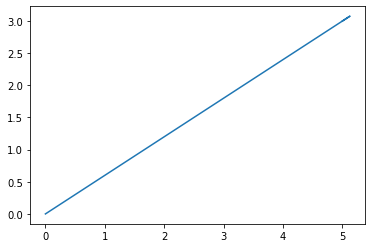

In [48]:
xs = xs.reshape(-1, 4)
plt.plot(xs[:, 0], xs[:, 1])
print(xs[:, :2])
plt.show()

In [2]:
import numpy as np
import scipy.linalg
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt
import math

# define continuous dynamics 
A = np.array([[0., 0., 1., 0.],
              [0., 0., 0., 1.],
              [0., 0., 0., 0.],
              [0., 0., 0., 0.]])
B = np.array([[0., 0.],
              [0., 0.],
              [1., 0.],
              [0., 1.]])
Q = np.diag([1.0, 1.0, 0.1, 0.1])
R = np.diag([0.1, 0.1])
state_dim, ctrl_dim = 4, 2

# Solve continuous lqr
S = np.array(scipy.linalg.solve_continuous_are(A, B, Q, R))
K = np.array(scipy.linalg.inv(R)@B.T@S)
print(K.shape)

# TODO: optimize this using lifted dynamics, don't loop through
def rollout(x0, xg, N, dt, dist_tol=None):
    xg = xg[:-1]  # goal time not used
    xs = np.zeros((N+1, len(x0)))
    
    t0 = x0[-1]
    t_horizon = t0 + np.arange(0, N+1) * dt
    xs[:, -1] = t_horizon
    
    # initial state is first waypoint
    xs[0, :] = x0
    
    x = np.copy(x0[:-1])
    for i in range(1, N+1):
        u = (-K @ (x-xg))
        xdot = A @ x + B @ u
        x += xdot * dt
        xs[i, :-1] = x  # :-1 don't overwrite time dimension
        
        if dist_tol is not None:
            dist = np.linalg.norm(x - xg)
            if dist < dist_tol:
                return xs[:i+1]
        
    return xs


N = 10
dt = 0.3
x0 = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
xg = np.array([5.0, 3.0, 0.0, 0.0, 0.0])

xs = rollout(x0, xg, N, dt)

(2, 4)


In [2]:
xs

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  4.74341649,  2.84604989,  0.3       ],
       [ 1.42302495,  0.85381497,  5.63557026,  3.38134216,  0.6       ],
       [ 3.11369603,  1.86821762,  4.4533688 ,  2.67202128,  0.9       ],
       [ 4.44970667,  2.669824  ,  2.62710594,  1.57626357,  1.2       ],
       [ 5.23783845,  3.14270307,  1.01616683,  0.6097001 ,  1.5       ],
       [ 5.5426885 ,  3.3256131 , -0.03451014, -0.02070608,  1.8       ],
       [ 5.53233546,  3.31940127, -0.52133027, -0.31279816,  2.1       ],
       [ 5.37593638,  3.22556183, -0.60307087, -0.36184252,  2.4       ],
       [ 5.19501511,  3.11700907, -0.47007166, -0.28204299,  2.7       ],
       [ 5.05399362,  3.03239617, -0.27341985, -0.16405191,  3.        ]])

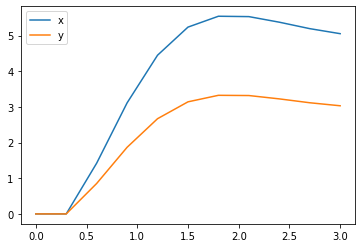

In [3]:
plt.plot(xs[:, -1], xs[:, 0], label="x")
plt.plot(xs[:, -1], xs[:, 1], label="y")
plt.legend()
plt.show()

In [ ]:
# while not reached goal:
#     if not plan_valid:
#         replan()
        
#     execute next_step
     

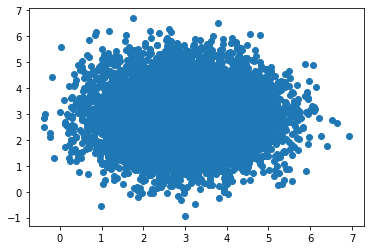

In [4]:
mean = np.array([3,3])
cov = np.array([
    [1, 0],
    [0, 1]
])
points = np.random.multivariate_normal(mean, cov, 10000)
plt.scatter(points[:, 0], points[:, 1])
plt.show()

In [182]:
vec = xg[:2] - x0[:2]
mag_vec = np.linalg.norm(vec)
vec /= mag_vec

In [183]:
np.array([vec[1], -vec[0]]).shape

(2,)

In [184]:
vec.T @ np.array([vec[1], -vec[0]])

0.0

In [5]:
# https://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/
# Biasing sampling along vector from start to goal
def sample_along_vec(x0, xg, N, D):
    vec = xg[:D] - x0[:D]
    vec /= np.linalg.norm(vec)

    mag_vec = 0.2 * np.linalg.norm(xg[:D] - x0[:D])
    mag_orth = 0.3 * mag_vec
    if D == 2:
        orth_vec = np.array([vec[1], -vec[0]])
        L = np.diag([mag_vec, mag_orth])
        V = np.hstack([
            vec[:, np.newaxis], orth_vec[:, np.newaxis]
        ])
    elif D == 3:
        # https://math.stackexchange.com/questions/137362/how-to-find-perpendicular-vector-to-another-vector
        # (0,c,−b),(−c,0,a) and (−b,a,0) for any nonzero vec <a,b,c>
        a, b, c = vec.flatten()
        orth_vec1 = np.array([0, c, -b])
        orth_vec2 = np.array([-c, 0, a])
        L = np.diag([mag_vec, mag_orth, mag_orth])
        V = np.hstack([
            vec[:, np.newaxis], orth_vec1[:, np.newaxis], orth_vec2[:, np.newaxis]
        ])
    else:
        raise(NotImplementedError("Only supports 2D or 3D"))
        
    mu = ((xg[:D] + x0[:D]) / 2).flatten()
    cov = V @ L @ V.T
    points = np.random.multivariate_normal(mu, cov, N)
    return points

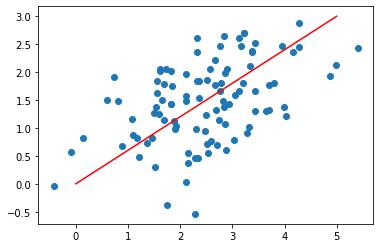

In [186]:
points = sample_along_vec(x0, xg, N=100, D=2)
plt.scatter(points[:, 0], points[:, 1])
plt.plot([x0[0], xg[0]], [x0[1], xg[1]], "r")
plt.show()

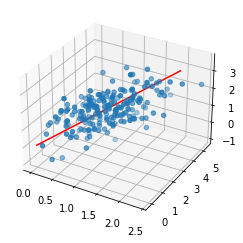

In [187]:

p1 = np.array([0, 0, 0.])
p2 = np.array([2, 5, 3.])
points = sample_along_vec(p1, p2, N=200, D=3)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.plot(xs=[p1[0], p2[0]], ys=[p1[1], p2[1]], zs=[p1[2], p2[2]], color="r")
plt.show()

True


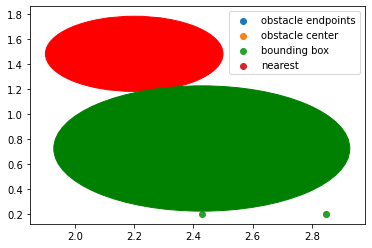

In [95]:
# TODO: make obstacle reachable sets polygons and use point-in-polygon to check collision
# if self is polygon, just find nearest point of other and use that 
class Obstacle(object):
    def __init__(self, traj, T, dt, r, space_dim):
        self.space_dim = space_dim
        self.r = r
        self.traj = traj
        self.T = T
        self.dt = dt
        self.N = int(T / dt)
        
        # reachable set
        vmax = 1
        num_angles = 10
        steer_angles = np.linspace(-0.5, 0.5, num_angles)
        base_pos = np.zeros(3)
        space_dim = 2
        self.reachable_trajs = []
        for steer in steer_angles:
            action = (vmax, steer)
            traj = self.rollout_const_vel(base_pos, action, dt, T)
            self.reachable_trajs.append(traj[:, :space_dim][np.newaxis, :])
        self.reachable_trajs = np.vstack(self.reachable_trajs)
            
    def calc_reachable_endpoints(self, pos, yaw, ti):
        # apply translation and rotation
        endpoints = self.reachable_trajs[:, ti, :self.space_dim]
        rot = Rotation.from_euler("XYZ", [0, 0, yaw]).as_matrix()[:2, :2]  # 2D rotation on xy plane
#         rot = Rotation.from_euler("XYZ", [0, 0, yaw]).as_matrix()
        endpoints = (rot @ endpoints.T).T + pos[np.newaxis, :]
        return endpoints
    
    @staticmethod
    def rollout_const_vel(state, action, dt, T):
        """Note: state at timestep 0 is NOT  original state, but next state, so original state is not part of rollout. This means
        every trajectory contains N successor states not including original state.
        Args:
            state ([type]): [description]
            v ([type]): [description]
            steer ([type]): [description]
            dt ([type]): [description]
            T ([type]): [description]
        Returns:
            [type]: [description]
        """
        v, steer = action
        N = int(T / float(dt))  # number of steps
        traj = np.zeros(shape=(N, 3))
        for i in range(N):
            theta = state[2]

            # state derivatives
            thetadot = v * math.tan(steer)
            xdot = v * math.cos(theta)
            ydot = v * math.sin(theta)
            state_dot = np.array([xdot, ydot, thetadot])

            # update state and store
            state = state + state_dot * dt
            traj[i] = state

        return traj
    
    def bounding_box_from_points(self, points):
        # min and max across all points
        min_state = np.min(points, axis=0)
        max_state = np.max(points, axis=0)
        return min_state, max_state
    
    def update_traj(self, traj):
        self.traj = traj
        self.N = len(traj)
        self.T = self.N * self.dt
        
    def is_intersect(self, other_pos, r, t, debug=False):
        # (dist < r1 + r2)**2
        # don't predict motion for t > T outisde predicted trajectory
        # mathematically equivalent to assigning equal probability to all of reachable set 
        # with finite discretization and over a large enough area, probabilities are just 0
        ti = min(int(t / self.dt), self.N-1)
        obs_pos = self.traj[ti, :self.space_dim]
        
        if ti > 0:
            vec = self.traj[ti, :self.space_dim] - self.traj[ti-1, :self.space_dim]
        else:
            vec = self.traj[ti+1, :self.space_dim] - self.traj[ti, :self.space_dim]
        
        yaw = math.atan2(vec[1], vec[0])
        
        endpoints = self.calc_reachable_endpoints(obs_pos, yaw, ti)
        
        if self.space_dim > 2:
            assert False, "Need to incorporate 3D  orientation too!"
            
            
        # AABB collision check: https://developer.mozilla.org/en-US/docs/Games/Techniques/3D_collision_detection
        min_corners, max_corners = self.bounding_box_from_points(np.vstack([endpoints, obs_pos[np.newaxis, :]]))
        minx, miny = min_corners
        maxx, maxy = max_corners
        cx, cy = other_pos
        
        # find closest point to sphere
        nearest_x = max(minx, min(cx, maxx))
        nearest_y = max(miny, min(cy, maxy))
#         z = max(minz, min(cz, maxz))
        
        sq_dist = np.sum((np.array([nearest_x, nearest_y]) - other_pos)**2)
        if debug:
            return sq_dist < (self.r + r)**2, [minx, maxx, miny, maxy], endpoints, (nearest_x, nearest_y)
        
        else:
            return sq_dist < (self.r + r)**2

t = 0.5
dt = 0.1
ti = int(t/dt)
full_N = int(10 / dt)
obs1_start = np.array([3, 0])
obs1_end = np.array([0, 4])
full_obs1_traj = np.linspace(obs1_start, obs1_end, full_N)

# traj, T, dt, r, dim)
obs_r = 0.5
obstacle = Obstacle(traj=full_obs1_traj[0:N], T=N*dt, dt=dt, r=obs_r, space_dim=2)

agent_pos = np.array([2.2, 1.48])
agent_r = 0.3
is_intersect, corners, endpoints, (nx, ny) = obstacle.is_intersect(
    other_pos=agent_pos, r=agent_r, t=t, debug=True
)
print(is_intersect)
minx, maxx, miny, maxy = corners

fig, ax = plt.subplots()

# plot agent
circle = plt.Circle(agent_pos, agent_r, color='r')
ax.add_patch(circle)


# plot obstacle
circle = plt.Circle([nx, ny], obs_r, color='g')
ax.add_patch(circle)

# circle = plt.Circle([minx, miny], obs_r, color='g')
# ax.add_patch(circle)
# circle = plt.Circle([minx, maxy], obs_r, color='g')
# ax.add_patch(circle)
# circle = plt.Circle([maxx, miny], obs_r, color='g')
# ax.add_patch(circle)
# circle = plt.Circle([maxx, maxy], obs_r, color='g')
# ax.add_patch(circle)
# for i in range(len(endpoints)):
#     circle = plt.Circle(endpoints[i], obs_r, color='g')
#     ax.add_patch(circle)


plt.scatter(endpoints[:, 0], endpoints[:, 1], label="obstacle endpoints")
plt.scatter(full_obs1_traj[ti, 0], full_obs1_traj[ti, 1], label="obstacle center")

plt.scatter([minx, minx, maxx, maxx], [miny, maxy, miny, maxy], label="bounding box")
plt.scatter([nx], [ny], label="nearest")
plt.legend()
plt.show()

0
True
[3. 0.]
[1. 5.]
[0. 2.]
1
[2.96969697 0.04040404]
[1.02020202 4.94949495]
[0.04040404 2.        ]
2
[2.93939394 0.08080808]
[1.04040404 4.8989899 ]
[0.08080808 2.        ]
3
[2.90909091 0.12121212]
[1.06060606 4.84848485]
[0.12121212 2.        ]
4
[2.87878788 0.16161616]
[1.08080808 4.7979798 ]
[0.16161616 2.        ]
5
[2.84848485 0.2020202 ]
[1.1010101  4.74747475]
[0.2020202 2.       ]
6
[2.81818182 0.24242424]
[1.12121212 4.6969697 ]
[0.24242424 2.        ]
7
[2.78787879 0.28282828]
[1.14141414 4.64646465]
[0.28282828 2.        ]
8
[2.75757576 0.32323232]
[1.16161616 4.5959596 ]
[0.32323232 2.        ]
9
[2.72727273 0.36363636]
[1.18181818 4.54545455]
[0.36363636 2.        ]
10


KeyboardInterrupt: 

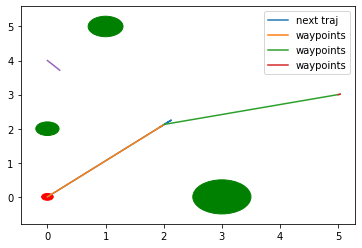

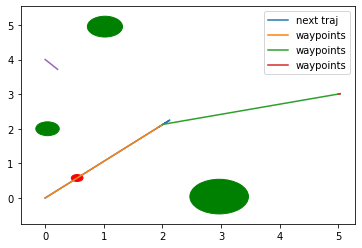

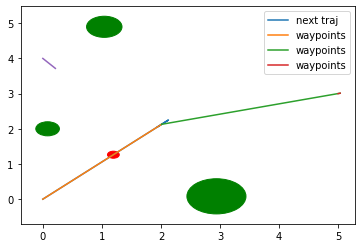

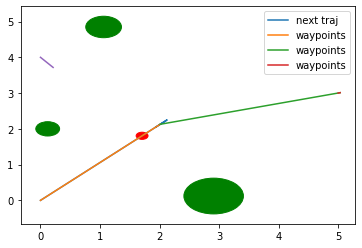

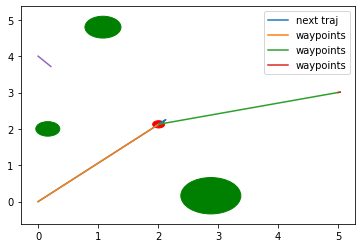

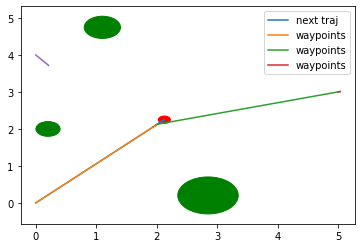

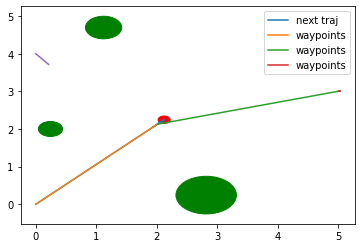

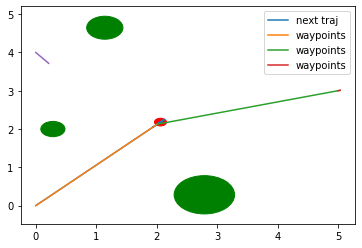

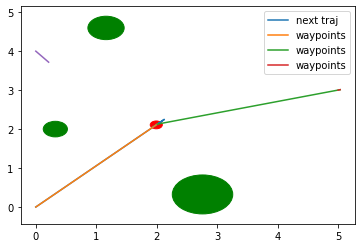

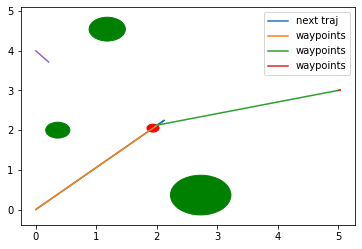

In [101]:
def filter_samples(traj, obstacles, space_dim, self_r, num_steps):
    stepsize = max(1, int(len(traj) / num_steps))
    samples = traj[1::stepsize]
    valid_samples = []
    for s in samples:
        sample_valid = True
        for obs in obstacles:
            pos = s[:space_dim]
            t = s[-1]
            if obs.is_intersect(pos, self_r, t):
                sample_valid = False
                break
        
        if sample_valid:
            valid_samples.append(s)
        else:
            break
        
    return valid_samples
        

def replan(x0, xg, self_r, obstacles, num_steps, space_dim, dist_tol, N, dt):
    state_dim = len(x0)
    found_path = False
    goali = None
    starti = 0
    nodes = [x0]
    came_from = dict()
    
    # Debug
    all_trajs = []
    goal_trajs = []
    
    t_horzion = (np.arange(0, N) * dt).reshape((N,1))
    
    count = 0
    while not found_path:
        count += 1
        # draw sample biased towards straight line 
        new_x = sample_along_vec(x0, xg, N=1, D=space_dim).flatten()  # 1 x 2
        new_x = np.concatenate([new_x, np.zeros((state_dim - space_dim))])  # fill remaining states as 0
        
        # find nearest neighbor - Naive euclidean distance
        dists = np.linalg.norm(np.array(nodes)[:, :space_dim] - new_x[:space_dim], axis=1)
        ni = np.argmin(dists)
        
        # generate LQR-based trajectory filtered to avoid obstacles
        traj = rollout(x0=nodes[ni], xg=new_x, N=N, dt=dt, dist_tol=dist_tol)
        valid_samples = filter_samples(traj, obstacles, space_dim, self_r, num_steps)

        # Debug
        stepsize = max(1, int(len(traj) / num_steps))
        valid_length = len(valid_samples)
        all_trajs.append(traj[:valid_length * stepsize])

        for s in valid_samples:
            si = len(nodes)
            nodes.append(s)
            came_from[si] = ni

            # try connecting to goal too
            traj_to_goal = rollout(s, xg, N, dt, dist_tol=dist_tol)
            valid_samples_goal = filter_samples(traj_to_goal, obstacles, space_dim, self_r, num_steps)

            # Debug
            stepsize = max(1, int(len(traj_to_goal) / num_steps))
            valid_length  = len(valid_samples_goal)
            goal_trajs.append(traj_to_goal[:valid_length * stepsize])
            
            for s_goal in valid_samples_goal:
                si_goal = len(nodes)
                nodes.append(s_goal)
                came_from[si_goal] = si
                dist = np.linalg.norm(s_goal[:space_dim] - xg[:space_dim])
                if dist < dist_tol:
                    goali = len(nodes)
                    nodes.append(xg)
                    came_from[goali] = si_goal
                    found_path = True
                    break
            
#     fig, ax = plt.subplots()
#     for traj in all_trajs:
#         ax.plot(traj[:, 0], traj[:, 1], "r")
#     for traj_to_goal in goal_trajs:
#         ax.plot(traj_to_goal[:, 0], traj_to_goal[:, 1], "b")
    
#     for obs in obstacles:
#         circle = plt.Circle(obs.pos, obs.r, color='g')
#         ax.add_patch(circle)
    
#     plt.show()

    # Build full path from start to goal if exists
    print(found_path)
    if found_path:
        waypoints = []
        curi = goali
        while curi != starti:
            waypoints.append(nodes[curi])
            curi = came_from[curi]

        waypoints.append(x0)
        waypoints.reverse()
        return waypoints
    
dt = 0.1
full_N = int(10 / dt)
obs1_start = np.array([3, 0])
obs1_end = np.array([0, 4])
full_obs1_traj = np.linspace(obs1_start, obs1_end, full_N)

obs2_start = np.array([1, 5])
obs2_end = np.array([3, 0])
full_obs2_traj = np.linspace(obs2_start, obs2_end, full_N)

obs3_start = np.array([0, 2])
obs3_end = np.array([4, 2])
full_obs3_traj = np.linspace(obs3_start, obs3_end, full_N)

# traj, T, dt, r, dim)

obstacles = [
    Obstacle(traj=full_obs1_traj[0:N], T=N*dt, dt=dt, r=0.5, space_dim=2),
    Obstacle(traj=full_obs2_traj[0:N], T=N*dt, dt=dt, r=0.3, space_dim=2),
    Obstacle(traj=full_obs3_traj[0:N], T=N*dt, dt=dt, r=0.2, space_dim=2),
]

full_trajs = [
    full_obs1_traj,
    full_obs2_traj,
    full_obs3_traj
]

    
# Setup
N = 10
dt = 0.3
# [x, y, vx, vy, t]
x0 = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
xg = np.array([5.0, 3.0, 0.0, 0.0, 0.0])  # time unknown, set arbtrarily
    
# compare to a simple baseline of just MPC with horizon N  with obstacle positions sampled at some intervals
self_r = 0.1
num_steps=20
space_dim = 2
dist_tol = 0.1  # euclidean distance tolerance for reaching target
reached_goal = False
it = 0
exec_it = 0
waypoints = None
while not reached_goal and it < full_N:
    print(it)
    # TODO: see if this replan needs to be run more frequently than just every N steps
    if waypoints is None or exec_it >= len(traj)-1:
        # update these in a loop for multiple obstacles
        for obsi in range(len(obstacles)):
            obstacles[obsi].update_traj(full_trajs[obsi][it:it + N])
        
        # replan
        waypoints = replan(x0, xg, self_r=self_r, obstacles=obstacles, 
                           num_steps=num_steps, space_dim=space_dim, dist_tol=dist_tol,
                           N=N, dt=dt)
        
        exec_it = 0
    
    # execute next step
        traj = rollout(x0, waypoints[1], N, dt, dist_tol=dist_tol)
        
    x0 = traj[exec_it + 1]
    
    
    fig, ax = plt.subplots()
    
    # draw agent
    circle = plt.Circle(x0[:space_dim], self_r, color='r')
    ax.add_patch(circle)
    ax.plot(traj[:, 0], traj[:, 1], label="next traj")
    waypoints = np.vstack(waypoints)
    for i in range(len(waypoints)-1):
        ax.plot([waypoints[i, 0], waypoints[i+1, 0]], 
                [waypoints[i, 1], waypoints[i+1, 1]], label="waypoints")
    
    ax.plot(obs1_traj[:, 0], obs1_traj[:, 1])
    for obs in obstacles:
        print(obs.traj[exec_it, :space_dim])
        circle = plt.Circle(obs.traj[exec_it, :space_dim], obs.r, color='g')
        ax.add_patch(circle)
    
    plt.legend()
    plt.draw()
    
    
    it += 1
    exec_it += 1
    
plt.show()

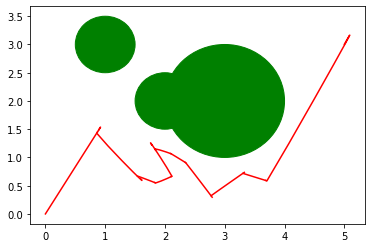

In [114]:


for i in range(0, len(waypoints)-1):
    traj = rollout(waypoints[i], waypoints[i+1], N, dt, dist_tol=dist_tol)
    valid_samples = filter_samples(traj, obstacles, 2, self_r, N)
    stepsize = max(1, int(len(traj) / num_steps))
    valid_length = len(valid_samples)
    valid_traj = traj[:valid_length * stepsize]
    ax.plot(valid_traj[:, 0], valid_traj[:, 1], "r")
    

plt.show()

In [1]:
import numpy as np
import scipy.linalg
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt
import math


# TODO: make obstacle reachable sets polygons and use point-in-polygon to check collision
# if self is polygon, just find nearest point of other and use that
class ObstacleBicycle(object):
    def __init__(self, T, r, dt=0.1, vmax=1, max_steer_psi=0.05, max_steer_phi=0.05, num_angles=10, traj=None):
        self.state_dim = 5  # x, y, z, theta, phi
        self.space_dim = 3  # x, y, z
        self.r = r
        self.traj = traj
        self.T = T
        self.dt = dt
        self.N = int(T / dt)

        # reachable set
        steer_angles_psi = np.linspace(-max_steer_psi, max_steer_psi, num_angles)
        steer_angles_phi = np.linspace(-max_steer_phi, max_steer_phi, num_angles)
        self.reachable_trajs = []
        for steer_psi in steer_angles_psi:
            for steer_phi in steer_angles_phi:
                action = (vmax, (steer_psi, steer_phi))
                traj = self.rollout_const_vel(action)
                self.reachable_trajs.append(traj[np.newaxis, :])
        self.reachable_trajs = np.vstack(self.reachable_trajs)

    def calc_reachable_endpoints(self, pos, yaw, pitch):
        # apply translation and rotation
        endpoints = self.reachable_trajs[:, -1, :self.space_dim]  # don't include theta in positions
        rot = Rotation.from_euler("XYZ", [pitch, 0, yaw]).as_matrix()
        endpoints = (rot @ endpoints.T).T + pos[np.newaxis, :]
        return endpoints

    def rollout_const_vel(self, action, x0=None):
        v, (steerxy, steerz) = action

        traj = np.zeros(shape=(self.N, self.state_dim))
        if x0 is None: x0 = np.zeros(self.state_dim)
        x = np.copy(x0)
        for i in range(self.N):
            theta, phi = x[-2:]

            # state derivatives
            thetadot = v * math.tan(steerxy)
            phidot = v * math.tan(steerz)
            
            vxy = v * math.cos(phi)
            vz = v * math.sin(phi)
            xdot = vxy * math.cos(theta)
            ydot = vxy * math.sin(theta)
            zdot = vz
            state_dot = np.array([xdot, ydot, zdot, thetadot, phidot])

            # update state and store
            x = x + state_dot * self.dt
            traj[i] = x

        return traj

    def bounding_box_from_points(self, points):
        # min and max across all points
        min_state = np.min(points, axis=0)
        max_state = np.max(points, axis=0)
        return min_state, max_state

    def update_traj(self, traj):
        if not isinstance(traj, np.ndarray):
            traj = np.vstack(traj)
        self.traj = traj

    def is_intersect(self, other_pos, r, t, debug=False):
        # (dist < r1 + r2)**2
        # don't predict motion for t > T outisde predicted trajectory
        # mathematically equivalent to assigning equal probability to all of reachable set
        # with finite discretization and over a large enough area, probabilities are just 0
        ti = min(int(t / self.dt), self.N - 1)
        obs_pos = self.traj[ti, :self.space_dim]

        if ti > 0:
            vec = self.traj[ti, :self.space_dim] - self.traj[ti - 1, :self.space_dim]
        else:
            vec = self.traj[ti + 1, :self.space_dim] - self.traj[ti, :self.space_dim]

        yaw = math.atan2(vec[1], vec[0])
        pitch = math.atan2(vec[2], vec[0])

        endpoints = self.calc_reachable_endpoints(obs_pos, yaw, pitch)

        # AABB collision check: https://developer.mozilla.org/en-US/docs/Games/Techniques/3D_collision_detection
        min_corners, max_corners = self.bounding_box_from_points(np.vstack([endpoints, obs_pos[np.newaxis, :]]))
        minx, miny, minz = min_corners
        maxx, maxy, maxz = max_corners
        cx, cy, cz = other_pos

        # find closest point to sphere
        nearest_x = max(minx, min(cx, maxx))
        nearest_y = max(miny, min(cy, maxy))
        nearest_z = max(minz, min(cz, maxz))

        sq_dist = np.sum((np.array([nearest_x, nearest_y, nearest_z]) - other_pos) ** 2)
        if debug:
            return (sq_dist < (self.r + r) ** 2, 
                    [minx, maxx, miny, maxy, minz, maxz], 
                    endpoints, 
                    (nearest_x, nearest_y, nearest_z))

        else:
            return sq_dist < (self.r + r) ** 2
        

        
t = 0
dt = 0.1
ti = int(t/dt)
full_N = int(10 / dt)
obs1_start = np.array([3, 0, 0])
obs1_end = np.array([0, 4, 6])
full_obs1_traj = np.linspace(obs1_start, obs1_end, full_N)

# agent_pos = np.array([2.2, 1.48])
# agent_r = 0.3
# is_intersect, corners, endpoints, (nx, ny) = obstacle.is_intersect(
#     other_pos=agent_pos, r=agent_r, t=t, debug=True
# )
# print(is_intersect)
# minx, maxx, miny, maxy = corners

# fig, ax = plt.subplots()

# # plot agent
# circle = plt.Circle(agent_pos, agent_r, color='r')
# ax.add_patch(circle)


# # plot obstacle
# circle = plt.Circle([nx, ny], obs_r, color='g')
# ax.add_patch(circle)

# circle = plt.Circle([minx, miny], obs_r, color='g')
# ax.add_patch(circle)
# circle = plt.Circle([minx, maxy], obs_r, color='g')
# ax.add_patch(circle)
# circle = plt.Circle([maxx, miny], obs_r, color='g')
# ax.add_patch(circle)
# circle = plt.Circle([maxx, maxy], obs_r, color='g')
# ax.add_patch(circle)
# for i in range(len(endpoints)):
#     circle = plt.Circle(endpoints[i], obs_r, color='g')
#     ax.add_patch(circle)
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

obs = ObstacleBicycle(T=1, r=0.1, dt=0.1, vmax=1, max_steer_psi=0.5, 
                      max_steer_phi=0.5, num_angles=2, traj=full_obs1_traj)

agent_pos = np.array([2.2, 1.48, 1])
agent_r = 0.3
is_intersect, corners, endpoints, (nx, ny, nz) = obs.is_intersect(
    other_pos=agent_pos, r=agent_r, t=t, debug=True
)
[minx, maxx, miny, maxy, minz, maxz] = corners

print(endpoints)
ax.scatter(endpoints[:, 0], endpoints[:, 1], zs=endpoints[:, 2], label="obstacle endpoints")
ax.scatter(full_obs1_traj[ti, 0], full_obs1_traj[ti, 1], zs=full_obs1_traj[ti, 2], label="obstacle center")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

pos = full_obs1_traj[0, :3]
vec = obs.traj[1, :3] - obs.traj[0, :3]
yaw = math.atan2(vec[1], vec[0])
pitch = math.atan2(vec[2], vec[0])
rot = Rotation.from_euler("XYZ", [pitch, 0, yaw]).as_matrix()

for i in range(obs.reachable_trajs.shape[0]):
    traj = (rot @ obs.reachable_trajs[i, :, :3].T).T + pos[np.newaxis, :] 
    ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], label="reachable_traj")

ax.scatter([minx, minx, minx, minx, maxx, maxx, maxx, maxx], 
           [miny, miny, maxy, maxy, miny, miny, maxy, maxy], 
           [minz, maxz, minz, maxz, minz, maxz, minz, maxz], label="bounding box")
# ax.scatter([nx], [ny], zs=[nz], label="nearest")
# plt.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[[ 2.62804695 -0.17418851  0.88588799]
 [ 2.62804695 -0.60419729  0.6708836 ]
 [ 2.26869555 -0.05365839  0.64482774]
 [ 2.26869555 -0.48366716  0.42982335]]


In [14]:
import  time
from closed_loop_rrt import ClosedLoopRRT

N = 10
dt = 0.1
T = N * dt
x0 = x = np.array([0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0])
xg = np.array([10.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0])
yaw_index = len(x) - 2  # 2nd to last value
radius = 0.2
obs_radii = [0.3, 0.6, 0.7, 0.5]
num_obs = len(obs_radii)

starts = np.array([
    [2, 0, 3],
    [4, 4, 4],
    [6, 2, 2],
    [8, 1, 3]
])
trajs = np.tile(starts[np.newaxis, :], (N, 1, 1))

obstacles = [
    ObstacleBicycle(T=T, r=obs_radii[i], vmax=1, traj=trajs[:, i, :],
                    max_steer_phi=0.5, max_steer_psi=0.5, num_angles=2) for
    i in range(num_obs)]
planner = ClosedLoopRRT(N=N, dt=dt, radius=radius, space_dim=3, dist_tol=0.3, ds=0.8)

start_time = time.time()

waypoints, traj_pieces = planner.replan(x, xg, obstacles=obstacles)

end_time = time.time()
print("Time taken: %.2f" % (end_time - start_time))
# array([-0.81062292,  0.        ,  0.86830519,  1.70406021,  2.4521829 ,
#         3.08446648,  3.59214063,  3.97956177,  4.25912985])

Time taken: 0.45


In [15]:
print(waypoints)

[array([0., 0., 3., 0., 0., 0., 0.]), array([ 2.07070326e-01,  7.26439776e-01,  3.18221586e+00,  4.91888780e-01,
        1.72563390e+00,  4.32847812e-01, -3.45609363e-16]), array([ 4.38891241e+00,  6.69560752e-01,  3.16794866e+00,  1.40433742e+01,
       -1.16208856e+00, -2.91491428e-01,  9.39266926e-15]), array([ 4.89734967e+00, -2.88280784e-02,  3.33592628e+00, -2.13540030e+00,
       -7.72374168e-02,  1.13400679e-01,  3.22242159e-15]), array([ 9.81835770e+00, -3.49846742e-03,  3.01092712e+00,  2.25865373e+00,
        2.26270315e-02, -1.44580669e-01,  8.50987481e-15])]


In [16]:
# import copy
# %matplotlib widget
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.set_xlabel("x")
# ax.set_ylabel("y")
# ax.set_zlabel("z")
# ax.scatter(x[0], x[1], x[2], label="init")
# waypoints_copy = copy.deepcopy(waypoints)
# print(x)
# waypoints[1][3:] = 0
# waypoints[1][-1] = x[-2]
# print(waypoints[1])
# ax.scatter(waypoints[1][0], waypoints[1][1], waypoints[1][2], label="wpt1")
# X_mpc = planner.model.rollout(x[:-1], waypoints[1])
# for i in range():
#     ax.plot(X_mpc[i:i+2, 0], X_mpc[i:i+2, 1], zs=X_mpc[i:i+2, 2], label="traj")

# plt.legend()
# plt.show()


In [17]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.scatter(waypoints[0][0], waypoints[0][1], waypoints[0][2], label="wpt")
for i in range(len(waypoints)-1):
    start = waypoints[i]
    end = waypoints[i+1]
    ax.scatter(waypoints[i+1][0], waypoints[i+1][1], waypoints[i+1][2], label="wpt")
    lqr_traj = planner.model.rollout(start, end)
#     ax.plot(lqr_traj[:, 0], lqr_traj[:, 1], zs=lqr_traj[:, 2], label="lqr-tracked")
    ax.plot(traj_pieces[i][:, 0], traj_pieces[i][:, 1], traj_pieces[i][:, 2], label="true")
    
ax.plot(traj_pieces[-1][:, 0], traj_pieces[-1][:, 1], traj_pieces[-1][:, 2], label="true")
        
# Draw obstacles
for obs in obstacles:
    cx, cy, cz = obs.traj[0, :3]
    r = obs.r
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = np.cos(u)*np.sin(v) * r + cx
    y = np.sin(u)*np.sin(v) * r + cy
    z = np.cos(v) * r + cz
    ax.plot_wireframe(x, y, z, color="r")
        
ax.scatter(x0[0], x0[1], zs=x0[2])
ax.scatter(xg[0], xg[1], zs=xg[2])
random_samples = planner.sample_along_vec(x0, xg, N=100, D=3)
ax.scatter(random_samples[:, 0], random_samples[:, 1], random_samples[:, 2])
        
plt.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')
r = 2
cx, cy, cz = 5, 5, 5
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v) * r + cx
y = np.sin(u)*np.sin(v) * r + cy
z = np.cos(v) * r + cz
ax.plot_wireframe(x, y, z, color="r")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …